# Day 2

Today we will cover the following topics:
- Building an ML pipeline with [Skicit-Learn](#scikit-learn)
- Fundamentals of [object-oriented programming](#object-oriented-programming) (OOP)
- [More OOP](#more-oop) (private attributes, decorators)

## Credits

Part of the material on OOP includes and builds upon the material from *Scientific Programming with Python* (WiSe 2023/2024), which was kindly provided by **Andriy Sokolov**.

## Scikit-Learn

The `scikit-learn` library offers a rich toolbox of various **machine learning algorithms** for classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. It is highly optimized and builds upon `NumPy`, `SciPy` and `matplotlib`.

Further, `scikit-learn` also offers **pipelines**, **evaluation metrics**, and selected **datasets**.

### Key Features of Scikit-Learn

- **Preprocessing:** Scaling, normalization, encoding categorical variables (e.g. normalization, one-hot-encoding)

- **Supervised Learning:** Regression (e.g., linear regression, decision trees) or classification (e.g. logistic regression, SVMs)

- **Unsupervised Learning:** Clustering (e.g., $k$-means, DBSCAN), dimensionality reduction (e.g. PCA)

- **Model Selection:** Cross-validation or hyperparameter tuning (e.g. grid search, randomized search)

Further, `scikit-learn` also offers **pipelines**, **evaluation metrics**, and selected **datasets**.

### Example

We will classify wine varieties based on the `wine` dataset provided by `scikitlearn`.

In [3]:
# Load the data
from sklearn.datasets import load_wine
import pandas as pd

# Load the Wine dataset
data = load_wine()
X = data.data       # 13 numerical features, e.g., alcohol, malic acid, ...
y = data.target     # target vector (cultivar labels)

# Explore the features
df = pd.DataFrame(X, columns=data.feature_names)
print(df.head())
print(f"Dataset shape: {df.shape}")

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [4]:
# Print out some summary statistics
print(df.describe())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

Class distribution: target
1    71
0    59
2    48
Name: count, dtype: int64


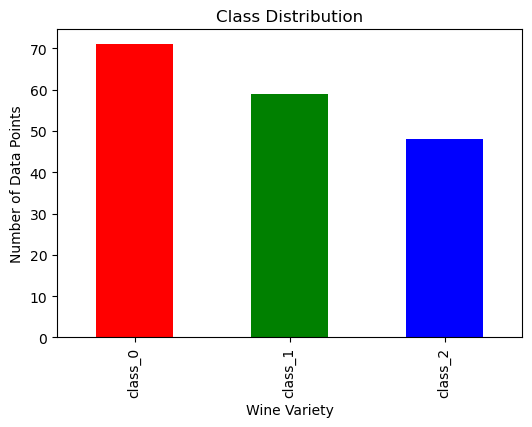

In [5]:
import matplotlib.pyplot as plt

# Next, we want to get an overview about the distribution of the class labels
df['target'] = data.target
class_counts = df['target'].value_counts()
print(f"Class distribution: {class_counts}")

# We can also plot the distribution as a bar chart
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Class Distribution')
plt.xlabel('Wine Variety')
plt.ylabel('Number of Data Points')
plt.xticks(ticks=[0, 1, 2], labels=data.target_names)
plt.show()

### Try it yourself! Explore the dataset a bit more...

In [ ]:
# TODO

### Next, we split the data into train and test data.

In [6]:
from sklearn.model_selection import train_test_split

# Split (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Training Set Size: {X_train.shape}")
print(f"Test Set Size: {X_test.shape}")

Training Set Size: (133, 13)
Test Set Size: (45, 13)


### Next, we create a pipeline!

A Pipeline allows you to sequentially apply a **list of transformers** (data transformations such as *normalization*, *standartization*, *non-linear transformations*, *discretization*, ...) to preprocess the data and, if desired, conclude the sequence with a **final predictor** for predictive modeling.


**Note:** Pick your favorite model (please don't use `DecisionTreeClassifier` as in the example)! Maybe you find a model that has a better performance.

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([
    ('scaler', StandardScaler()),                     # Preprocessing step
    ('classifier', DecisionTreeClassifier(random_state=0)) # Classification step
])

# Train model with pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', DecisionTreeClassifier(random_state=0))])

In [8]:
from sklearn.metrics import accuracy_score, classification_report
# Make predictions on test data using trained pipeline
y_pred = pipe.predict(X_test)

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.2f}")

Accuracy on Test Set: 0.96


**Miniexercise:** Perform a cross validation (5-folds) with the same pipeline. Which results do you get? Feel free to try multiple models and report the one with the best average accuracy (`score="accuracy"`).

In [ ]:
# Write your solution below
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    ExtraTreesClassifier,
    HistGradientBoostingClassifier,
    AdaBoostClassifier
)

pipe = Pipeline([
    ('scaler', StandardScaler()),                     # Preprocessing step
    ('classifier', RandomForestClassifier(random_state=0)) # Classification step
])

# Train model with pipeline
pipe.fit(X_train, y_train)

In [ ]:
# Write second part of miniexercise below

___

# Object-Oriented Programming

Object-Oriented Programming (OOP) offers several advantages that contribute to its popularity and effectiveness in software development:

1. **Modularity:** OOP promotes modular design, where a program is divided into small, manageable units called objects. Each object represents a real-world entity or concept, and these objects can be developed and tested independently. 
2. **Reusability:** OOP supports the concept of reusability, allowing developers to reuse existing classes and objects in new projects. 
3. **Encapsulation:** Encapsulation is the bundling of data and methods that operate on the data into a single unit, or class. It hides the internal details of an object and restricts access to its internal state. 
4. **Abstraction:** Abstraction is the process of simplifying complex systems by modeling classes based on the essential properties they share. It allows developers to focus on relevant details while ignoring unnecessary complexities. 
5. **Inheritance:** Inheritance allows a class (subclass or derived class) to inherit the properties and behaviors of another class (base class or parent class). This promotes code reuse and helps in creating a hierarchy of classes with shared attributes and methods. 
6. **Polymorphism:** Polymorphism enables objects of different classes to be treated as objects of a common base class. This allows for more generic and flexible code, where the same method name can be used for different types of objects. Polymorphism can take various forms, such as method overloading and method overriding.
7. **Flexibility and Scalability:** OOP provides a flexible and scalable framework for software development. 
8. **Code Maintenance and Debugging:** OOP makes code maintenance and debugging more straightforward. 
9. **Natural Modeling:** OOP allows developers to model real-world entities and relationships directly in their code.

## Classes

- To define a class in Python, we need to use the **class** keyword followed by a **name** and a **colon**.
- Then one uses the function `__init__()` to declare which attributes each instance of the class should have. It is also called **constructor**.
- **self** is a conventional name used as the first parameter of a method within a class. **It refers to the instance of the class itself.**

In [ ]:
class Employee:
    def __init__(
        self,
        name,
        age,
    ):
        self.name = name
        self.age = age

bob = Employee("Bob", 34)
print(bob.age)

### Instance Methods

Below, we provide an example for instance methods that can access instances of an object of a class via the **self** argument (which is always the first argument). In addition, we see the difference between **class attributes** and **instance attributes**.

In [ ]:
class Employee:
  profession = "Scientist" # class attribute

  def __init__(self, name, age):
    # instance attributes
    self.name = name
    self.age = age
  
  def summary(self):
    return f"{self.name} is {self.age} years old."

  def is_older_than(self, empl):
    if not isinstance(empl, Employee):
        raise TypeError(f"Object should be an instance of Class Employee!")
    return self.age > empl.age
  
bob = Employee("Bob", 34)
alice = Employee("Alice", 36)
print(bob.summary())
print(bob.is_older_than(alice))

To avoid unexpected behavior, we check in the method `is_older_than` if the input has the expected type. Typically, one would specify the expected types of the arguments in the docstring.

In [ ]:
bob.is_older_than(12)

### String Representations of a Class Object

In [ ]:
class Bag:
  def __init__(self):
    self.data = []

  def __str__(self):
    return f"My Data: {self.data}"

  def add(self, x):
    self.data.append(x)

  def addtwice(self, x):
    self.add(x)
    self.add(x)

my_bag = Bag()
my_bag.add(1)
my_bag.addtwice(2)
print(my_bag.data)
print(my_bag)
print(str(my_bag))

### Inheritance

**Inheritance** is the process by which one class takes on the attributes and methods of another. Newly formed classes are called **child classes**, and the classes that you derive (or inherit) child classes from are called **parent classes**.

In [ ]:
class Parent:
  hair_color = "brown"

# Here the Class `Child` inherits from 
# `Parent` (or extends the parent class)
class Child(Parent):
  pass

c = Child()
print(isinstance(c, Child))
print(isinstance(c, Parent))
print(issubclass(Child, Parent))
print(issubclass(Child, Child))
print(issubclass(int, Child))
print(issubclass(int, object))
print(issubclass(Child, object))

### `super()`

We saw that the constructor of a class is implemented in the `__init__()` method. But how do we call the constructor of a parent class? The answer is `super()`!

In [ ]:
class Parent:
  def __init__(self, name):
    self.hair_color = "brown"
    self.name = name

class Child(Parent):
  def __init__(self, name, first_name):
    super().__init__(name)
    self.first_name = first_name

c = Child("Bond", "James")
print(f"{c.first_name} {c.name}")
print(c.hair_color)

___

## Exercise 3 (Library)

1. Create a Book class with the following attributes:
    - `title` (instance attribute)
    - `author` (instance attribute)
    - `available_copies` (instance attribute): Number of available copies of the book.
    - `total_books` (class attribute): Tracks the total number of *distinct* books (not copies) in the library (initial value should be zero).
2. Add the following methods to the class:
    - A constructor to initialize a new book with its title, author, and available copies.
    - An instance method called `borrow()` that reduces the number of available copies by 1 if there are any left; otherwise, print "No copies available."
    - An instance method called `return_book()` that increases the number of available copies by 1.
    - Make sure that when we print an object, the print statement returns a string including all instance attributes.
3. Create an `EBook` subclass that inherits from the `Book` class.
    - The `EBook` class should have another instance attribute `file_size_mb` that has to be set in the constructor, and it automatically sets the number of copies to infinity.
    - Further, it needs to override the print function to output the file size and not the number of available copies.

Last, evaluate your code based on the provided test cases below.

In [35]:
# Write your solution below

class Book:

    total_books = 0
    def __init__(
        self,
        title,
        author,
        available_copies
    ):
        self.title = title
        self.author = author
        self.available_copies = available_copies
        Book.total_books += 1
        
    
    def borrow(self):
        if self.available_copies > 0:
            self.available_copies -= 1
        else:
            print('No copies left')

    def return_book(self):
        self.available_copies = self.available_copies +1

    def __str__(self):
        return f"MyClass instance with parameters: {self.title}, {self.author}, {self.available_copies}"


    
class EBook(Book):
    def __init__(
        self,
        title,
        author,
        file_size_mb = float('inf'),
        #available_copies

    ):
        super().__init__(title, author, float("inf"))
        self.title = title
        self.author = author
        self.file_size_mb = file_size_mb

    def __str__(self):
        return f"MyClass instance with parameters: {self.title}, {self.author}, {self.file_size_mb}"
    




In [36]:
# Test cases

# Create two instances of Book
book_1 = Book("To Kill a Mockingbird", "Harper Lee", 5)
book_2 = Book("1984", "George Orwell", 1)

# Borrow print and return
print(Book.total_books) # should return 2
book_2.borrow()         # should work
print(book_2)           # print title, author, 0 copies available
book_2.borrow()         # should display that no copies are left
book_2.return_book()    # Increase available copies back to one
print(book_2)           # Now there should be again 1 copy

# Create an instance of EBook
ebook = EBook("Python Programming Essentials", "Jane Doe", file_size_mb=15)
print(Book.total_books) # should return 3

# Should not return any errors
for i in range(5):
    ebook.borrow()
ebook.return_book()
print(ebook)            # Print out title, author and file size

2
MyClass instance with parameters: 1984, George Orwell, 0
No copies left
MyClass instance with parameters: 1984, George Orwell, 1
3
MyClass instance with parameters: Python Programming Essentials, Jane Doe, 15


___

### Multiple Inheritance

**Multiple inheritance** in Python refers to a situation where a **class can inherit** attributes and methods **from more than one parent class**. This allows a child class to inherit features from multiple parent classes. *While Python supports multiple inheritance, it's important to use it judiciously to avoid potential issues.*

In [28]:
class A(object):
  def method(self):
    print("class A")

class B(object):
  def method(self):
    print("class B")

class C(B,A):
  def __init__(self):
    super().__init__()    

C().method()
print(isinstance(C(), B))
print(isinstance(C(), A))
C().method()

class B
True
True
class B


Challenges and potential problems of multiple inheritance:

- **Diamond Problem:** The diamond problem occurs when a class inherits from two classes with a common ancestor. 
- **Complexity and Readability**
- **Maintenance Issues**
- **Name Clashes**
- **Initialization Order**
- **Limited Support in Some Languages**

### Dunder Methods

In Python, **dunder** is a colloquial term that stands for **double underscore**. Dunder methods, also known as magic methods or special methods, are a set of predefined methods in classes that are surrounded by double underscores on both sides of their names.

Some examples include:

- `__init__(self, ...)`: The constructor method, called when an object is instantiated. It initializes the object's attributes. 
- `__str__(self)`: The string representation method, called by the built-in `str()` function. It returns a human-readable string representation of the object.
- `__len__(self)`: The length method, called by the built-in `len()` function. It returns the length of the object. 
- `__add__(self, other)`: The addition method, called when the `+` operator is used with instances of the class.
- `__getitem__(self, key)`: The item retrieval method, used to implement indexed access.

In [ ]:
class MyClass:
  def __init__(self, param1, param2):
    self.param1 = param1
    self.param2 = param2

  def __str__(self):
    return f"MyClass instance with parameters: {self.param1}, {self.param2}"

  def __len__(self):
    return len(self.param1) + len(self.param2)

  def __add__(self, other):
    if isinstance(other, MyClass):
      return MyClass(self.param1 + other.param1, self.param2 + other.param2)
    else:
      raise TypeError("Unsupported operand type for +")

  def __getitem__(self, key):
    if key == 0:
      return self.param1
    elif key == 1:
      return self.param2
    else:
      raise IndexError("Index out of range")

# Examples
obj1 = MyClass("abc", "def")
obj2 = MyClass("123", "456")

# __str__
print(obj1)

# __len__
print(len(obj1))

# __add__
obj3 = obj1 + obj2
print(obj3.param1)
print(obj3.param2)

# __getitem__
print(obj1[0])
print(obj1[1])

___

## Exercise 4 (Playlist)

Design a playlist system (a class `Playlist`) where the Playlist class inherits from `collections.abc.Iterator` ([more details](https://docs.python.org/3/library/collections.abc.html#collections.abc.Iterator)). 

As you can see [here](https://docs.python.org/3/glossary.html#term-iterator), to define a real iterator, you need to implement the methods `__next__()` which successively returns the next item until the end is reached and then raises a `StopIteration` exception instead. Further, the `__iter__()` method needs to be specified, which returns the iterator object itself (note that when an iterator is returned, the next element should be the first one).

In summary, the `Playlist` class should be structured as follows:

- Inherit from `collections.abc.Iterator` and implement the required methods for an iterator: `__iter__(self)` and `__next__(self)`.
- Attributes:
    - `songs` (list of song titles)
    - `_current_index` (tracks position in iteration).
- Additional methods:
    - `Constructor` (`__init__(self, songs)`): Initializes the playlist and resets `_current_index`.
    - `__str__(self)`: should return a string representation of all songs in the playlist

Bonus question: Why should we inherit from `collections.abc.Iterator`, when we can just implement the required methods anyway?

Test your class with the provided example code below.

In [137]:
# Write your solution below

In [ ]:
# Test cases

my_playlist = Playlist([
    "Holiday",
    "Basket Case",
    "21 Guns",
    "Boulevard of Broken Dreams"
])

# Should print the entire playlist
print(my_playlist)

print("\nNow playing songs one by one...")

# Iterate through the playlis (requires __iter__, __next__)
for song in my_playlist:
    print(f"Playing: {song}")

print("\nEnd of Playlist!")

print("\n--- Manual Iteration ---")

# Manually go though the playlist until it ends
manual_playlist = iter(my_playlist)
while True:
    try:
        print(next(manual_playlist))
    except StopIteration:
        print("No more songs!")
        break


## More OOP

## Private, Protected and Public

Different to other programming languages, where one has to explicitly declare an attribute as public, private or protected using the corresponding keyword (e.g., `private x`), all members in a **Python** class are **public by default**. Any member can be accessed from outside the class environment. 

### Protected Attributes

- While the property of protected attributes is **not enforced** in Python, it is important that programmers know the concept and **do not use protected variables outside of their intended scope**!
- Somebody had a reason why this variable was declared protected! 
- Often, variables like datasets need to be accessed carefully, and it is recommended to access them via the methods defined in a class. Like `d[i]` and not `d._data[i]`.

### Private Attributes

If you really need to protect a variable, e.g., because it may leak sensible information if directly accessed by a client, use **double underscore** to make it **private**, e.g., `__age`.

In [ ]:
class A:
    def __init__(self, name, age):
        self._name = name
        self.__age = age

bob = A("Bob", 24)
print(bob._name)
print(bob.__age)

## Decorators

A **decorator** is a **design pattern** in Python that allows a user to **add new functionality to an existing object without modifying its structure**. Decorators are usually called before the definition of a function you want to decorate.

- **Decorators** wrap a function, modifying its behavior.
- Python allows you to use **decorators in a simpler way with the @ symbol**, sometimes called the “pie” syntax. 

In [ ]:
def my_decorator(func):
  def wrapper():
    print("Something is happening before the function is called.")
    func()
    print("Something is happening after the function is called.")
  return wrapper

def say_whee():
  print("Whee!")

say_whee = my_decorator(say_whee) 
# now saywhee is decorated  
say_whee()    

### do_twice

Example code for all `do_twice` variants is provided in `my_decorator.py`.

___

## Exercise 1 (Measuring Time)

Create a decorator `timer` that executes a function with generic arguments, returns the value return by the function and prints the time the function took to be executed. You can use the `time` package to track the time.

Bonus: You can use a special decorator for your wrapper method that ensures that the function `__name__` of the original function is preserved (see last check). The function is called `functools.wraps`.

Execute the test code below to check if your decorator works as expected.

In [ ]:
import functools
import time

def timer(func):
    # TODO

In [ ]:
# Some test functions

@timer
def waste_some_time(num_times):
    for _ in range(num_times):
        sum([i**2 for i in range(10000)])
    return num_times * 10000

@timer
def waste_some_time_and_greet(num_times, name):
    for _ in range(num_times):
        sum([i**2 for i in range(10000)])
    print(f"Hi {name}!")
    return num_times * 10000

waste_some_time(1)              # Should print the execution time
val = waste_some_time(999)      # Should print the execution time (~1.4 secs for me)
print(val)                      # Should print 9990000
print(waste_some_time.__name__) # Should print `waste_some_time`
print(waste_some_time_and_greet(23, "Bob"))
# Should print `Hi Bob`, the execution time in the next line and then 230000 in line three.